<a href="https://colab.research.google.com/github/slipstream8125/SIH_python_code/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [2]:
import zipfile
import io

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [3]:
import os

dataset_folder = 'data'

files = os.listdir(dataset_folder)
print(files)

['test', 'train']


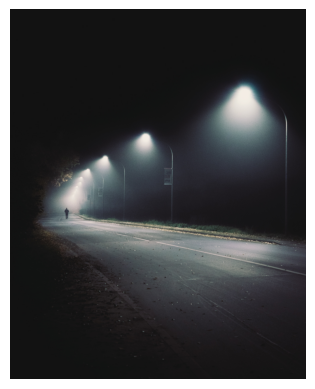

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'data/train/on/image13.jpg'


img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [5]:
!ls data

test  train


In [6]:
!ls data/train

off  on


In [7]:
import os

# Walk through the pizza steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/test'.
There are 0 directories and 30 images in 'data/test/on'.
There are 0 directories and 30 images in 'data/test/off'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 30 images in 'data/train/on'.
There are 0 directories and 30 images in 'data/train/off'.


In [8]:
# Get the class names programmatically
import pathlib

import numpy as np
data_dir = pathlib.Path("data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Created a list of class names from the subdirectories folder

In [9]:
print(class_names)

['off' 'on']


In [10]:
# Let's visualise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (we will view the images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image
  return img

['image01.jpg']
Image shape: (750, 1000, 3)


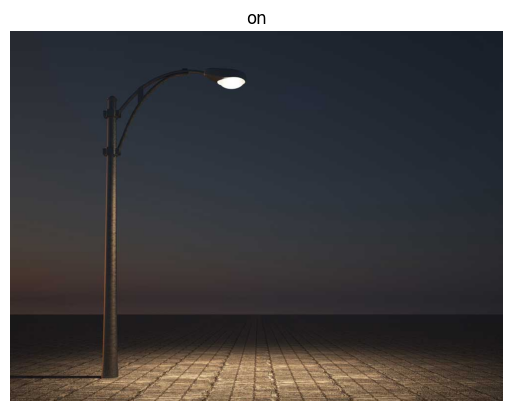

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir = "data/train/", target_class = "on")

['image25.jpg']
Image shape: (347, 960, 3)


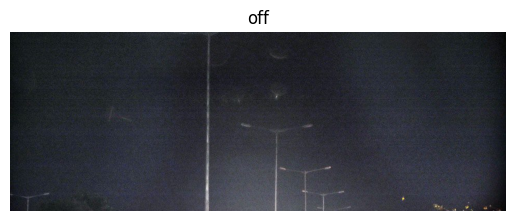

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir = "data/train/", target_class = "off")

In [13]:
img

array([[[16, 21, 25],
        [13, 18, 22],
        [20, 25, 29],
        ...,
        [ 4,  6,  5],
        [ 6,  8,  7],
        [14, 16, 15]],

       [[22, 27, 31],
        [17, 22, 26],
        [21, 26, 30],
        ...,
        [ 5,  7,  6],
        [ 5,  7,  6],
        [ 9, 11, 10]],

       [[17, 22, 25],
        [12, 17, 20],
        [15, 20, 23],
        ...,
        [ 7,  9,  8],
        [ 5,  7,  6],
        [ 2,  4,  3]],

       ...,

       [[19, 19, 29],
        [14, 14, 24],
        [11, 11, 21],
        ...,
        [10, 10, 12],
        [ 8,  9, 11],
        [ 8,  9, 11]],

       [[16, 16, 26],
        [12, 12, 22],
        [12, 12, 22],
        ...,
        [10, 10, 12],
        [ 8,  9, 11],
        [ 8,  9, 11]],

       [[13, 13, 21],
        [11, 11, 19],
        [14, 14, 22],
        ...,
        [ 9, 10, 12],
        [ 8, 10,  9],
        [ 8, 10,  9]]], dtype=uint8)

In [14]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(347, 960, 3), dtype=uint8, numpy=
array([[[16, 21, 25],
        [13, 18, 22],
        [20, 25, 29],
        ...,
        [ 4,  6,  5],
        [ 6,  8,  7],
        [14, 16, 15]],

       [[22, 27, 31],
        [17, 22, 26],
        [21, 26, 30],
        ...,
        [ 5,  7,  6],
        [ 5,  7,  6],
        [ 9, 11, 10]],

       [[17, 22, 25],
        [12, 17, 20],
        [15, 20, 23],
        ...,
        [ 7,  9,  8],
        [ 5,  7,  6],
        [ 2,  4,  3]],

       ...,

       [[19, 19, 29],
        [14, 14, 24],
        [11, 11, 21],
        ...,
        [10, 10, 12],
        [ 8,  9, 11],
        [ 8,  9, 11]],

       [[16, 16, 26],
        [12, 12, 22],
        [12, 12, 22],
        ...,
        [10, 10, 12],
        [ 8,  9, 11],
        [ 8,  9, 11]],

       [[13, 13, 21],
        [11, 11, 19],
        [14, 14, 22],
        ...,
        [ 9, 10, 12],
        [ 8, 10,  9],
        [ 8, 10,  9]]], dtype=uint8)>

In [15]:
# NORMALISATION
# All the values should be between 0 and 1 for better results
img/255

array([[[0.0627451 , 0.08235294, 0.09803922],
        [0.05098039, 0.07058824, 0.08627451],
        [0.07843137, 0.09803922, 0.11372549],
        ...,
        [0.01568627, 0.02352941, 0.01960784],
        [0.02352941, 0.03137255, 0.02745098],
        [0.05490196, 0.0627451 , 0.05882353]],

       [[0.08627451, 0.10588235, 0.12156863],
        [0.06666667, 0.08627451, 0.10196078],
        [0.08235294, 0.10196078, 0.11764706],
        ...,
        [0.01960784, 0.02745098, 0.02352941],
        [0.01960784, 0.02745098, 0.02352941],
        [0.03529412, 0.04313725, 0.03921569]],

       [[0.06666667, 0.08627451, 0.09803922],
        [0.04705882, 0.06666667, 0.07843137],
        [0.05882353, 0.07843137, 0.09019608],
        ...,
        [0.02745098, 0.03529412, 0.03137255],
        [0.01960784, 0.02745098, 0.02352941],
        [0.00784314, 0.01568627, 0.01176471]],

       ...,

       [[0.0745098 , 0.0745098 , 0.11372549],
        [0.05490196, 0.05490196, 0.09411765],
        [0.04313725, 0

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Pre-process data (get all of the pixel values between 0 and 1, also called normalisation)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup path to our data directories
train_dir = "/content/data/train"
test_dir = "/content/data/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size  = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the CNN model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(tf.expand_dims(train_data, axis = -1),
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))